## Markowitz方差组合模型

## 目录
1. 什么是Markowitz方差组合模型？
2. Portfolioopt的输入格式是什么？
3. 如何计算组合风险？
4. 如何将Markowitz可视化？

## 什么是Markowitz方差组合模型？
马克维茨投资组合理论的基本假设为：

(1)投资者是风险规避的，追求期望效用最大化；

(2)投资者根据收益率的期望值与方差来选择投资组合；

(3)所有投资者处于同一单期投资期。马克维茨提出了以期望收益及其方差(E，δ2)确定有效投资组合。

## Portfolioopt的输入格式是什么？
安装Portfolioopt: pip install Portfolioopt

In [1]:
from datetime import datetime
import pandas as pd
import portfolioopt as opt

symbol=['600036.XSHG','600050.XSHG','601318.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data
PN = pd.Panel(data_dict)
print(PN)

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 215 (major_axis) x 5 (minor_axis)
Items axis: 600036.XSHG to 601318.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: close to volume


In [2]:
data_r = PN.minor_xs('close').pct_change()[1:]
print (data_r)

                     600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                  
2017-01-04 15:00:00     0.001587    -0.001112    -0.000250
2017-01-05 15:00:00     0.006194     0.055679     0.001878
2017-01-06 15:00:00    -0.007158    -0.022152    -0.007998
2017-01-09 15:00:00    -0.001730     0.004315     0.000000
2017-01-10 15:00:00     0.000000    -0.019334    -0.006047
2017-01-11 15:00:00     0.000578    -0.086528     0.000000
2017-01-12 15:00:00     0.002743    -0.033573    -0.001014
2017-01-13 15:00:00     0.011661    -0.003722     0.009896
2017-01-16 15:00:00     0.019212    -0.007472     0.017714
2017-01-17 15:00:00    -0.005864    -0.005019    -0.005308
2017-01-18 15:00:00     0.007584     0.008827     0.006701
2017-01-19 15:00:00    -0.003764    -0.052500    -0.004438
2017-01-20 15:00:00     0.002658     0.007916     0.005572
2017-01-23 15:00:00    -0.003768     0.005236    -0.001970
2017-01-24 15:00:00     0.019471    -0.005208    -0.0002

In [3]:
#主要的两个输入模式
exp_rets = data_r.mean()*252
cov_mat = data_r.cov()*252
print (exp_rets)
print (cov_mat)

600036.XSHG    0.695874
600050.XSHG    0.270893
601318.XSHG    0.918358
dtype: float64
             600036.XSHG  600050.XSHG  601318.XSHG
600036.XSHG     0.063026     0.006673     0.034142
600050.XSHG     0.006673     0.180320     0.017325
601318.XSHG     0.034142     0.017325     0.062236


In [4]:
#计算目标收益的权重
portfolio_1 = opt.markowitz_portfolio(cov_mat, exp_rets, 0.2, allow_short=False, market_neutral=False)
print (portfolio_1)

600036.XSHG    0.438192
600050.XSHG    0.179256
601318.XSHG    0.382552
dtype: float64


In [9]:
#计算最小方差的权重
portfolio_mv = opt.min_var_portfolio(cov_mat, allow_short=False)
portfolio_mv

600036.XSHG    0.438192
600050.XSHG    0.179256
601318.XSHG    0.382552
dtype: float64

In [10]:
#计算最优组合的权重
portfolio_tp = opt.tangency_portfolio(cov_mat, exp_rets, allow_short=False)
portfolio_tp

600036.XSHG    0.258217
600050.XSHG    0.009330
601318.XSHG    0.732453
dtype: float64

In [11]:
#去除少于0.01权重的股票
weigth_t = opt.truncate_weights(portfolio_tp, min_weight=0.01, rescale=True)
weigth_t

600036.XSHG    0.260649
600050.XSHG    0.000000
601318.XSHG    0.739351
dtype: float64

## 如何计算组合风险？
$Portfolio Variance = x'\sum x$

x = weights

$\sum = Cov$

In [13]:
import numpy as np

Portfolio_v = np.dot(weigth_t.T, np.dot(cov_mat,weigth_t))
P_sigma = np.sqrt(Portfolio_v)
P_sigma

0.22685236509840342

## 如何将Markowitz可视化？

sharpe: 3.61630738966


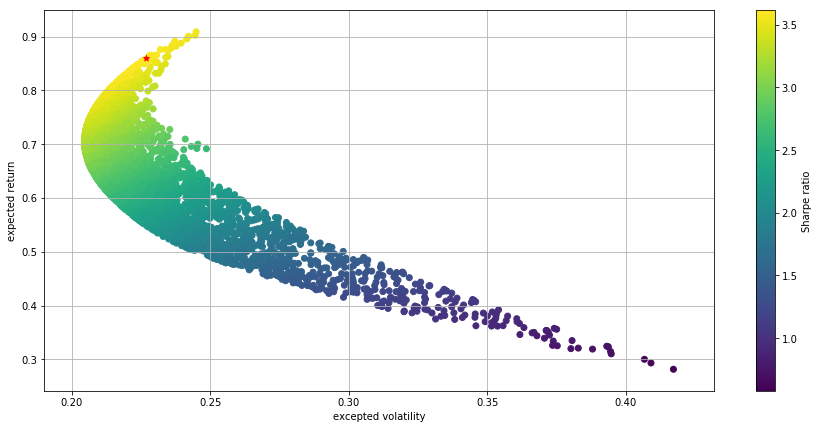

In [15]:
import matplotlib.pyplot as plt

port_returns = []
port_variance = []
for p in range(4000):
    weights = np.random.rand(len(data_r.T))
    weights /= np.sum(weights)
    port_returns.append(np.sum(data_r.mean()*252*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(cov_mat,weights))))
port_returns = np.array(port_returns)
port_variance = np.array(port_variance)

risk_free = 0.04
P_r = np.sum(exp_rets*weigth_t)
sharpe = (P_r-risk_free)/P_sigma
print('sharpe:', sharpe)

plt.figure(figsize = (15,7))
plt.scatter(port_variance, port_returns, c=(port_returns-risk_free)/port_variance, marker='o')
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.scatter(P_sigma, P_r, c='r', marker='*')
plt.show()

## 作业
选择三只或以上的股票，用Portfolioopt 将最优组合算出来，并将其可视化。